# 程序思路

## 构建网络

1. 星形网络
2. 规则网络
3. WS小世界
4. BA无标度

## 增加边的逻辑

1. 在度最小的两个点上加边，直到全连通。
2. 在度最大的两个点上加边，直到全连通。
3. 随机加边，直到全连通。

## 绘图逻辑

（略）

横坐标：已增加了$\Delta$条边

纵坐标：紧密度$T$


In [1]:
# Import
import matplotlib.pyplot as plt
import networkx as nx
# 构建三种网络
from xnets import *
# 构建社区紧密度函数
from tightness import *
from networkx import average_clustering

In [2]:
from copy import deepcopy

class DegreeList:
    def __init__(self, sorted_degree_pairs):
        self.__pairs = sorted_degree_pairs
        # max val which is exactly less than n-1.
        self.__max_cur = len(sorted_degree_pairs) - 1
        self.update_mc()

    @property
    def mc(self):
        return self.__max_cur

    @property
    def li(self):
        """
        Degree list data.
        """
        return self.__pairs
    
    def update_mc(self):
        if self.__pairs[self.__max_cur][1] < len(self.__pairs) - 1: return
        while self.__max_cur > 1:
            self.__max_cur -= 1
            if self.__pairs[self.__max_cur][1] < len(self.__pairs) - 1: break

    def __str__(self):
        return 'Pairs: {}\nMax cursor: {}'.format(self.__pairs, self.__max_cur)



def sorted_degree(net):
    if not isinstance(net, nx.Graph):
        raise TypeError('Parameter 1 is not a networkx graph.')
    return DegreeList(sorted(deepcopy(net.degree), key=lambda x: x[1]))


def _rearrange_list(idx, dl):
        i = idx+1
        while i < len(dl) and dl[idx][1] >= dl[i][1]:
            i += 1
        tmp = dl.pop(idx)
        dl.insert(i-1, tmp)
        
        
def add_edge_to_lowest_nodes(net, degree_list):
    dl = degree_list.li
    a, b = 0, 1
    while b < len(dl) and dl[b][0] in net.neighbors(dl[a][0]):
        b += 1
    net.add_edge(dl[a][0], dl[b][0])
    dl[a] = (dl[a][0], dl[a][1]+1)
    dl[b] = (dl[b][0], dl[b][1]+1)
    _rearrange_list(b, dl)
    _rearrange_list(a, dl)
    degree_list.update_mc()
    return True


def add_edge_to_highest_nodes(net, degree_list):
    dl = degree_list.li
    a, b = degree_list.mc-1, degree_list.mc
    while a > 0 and dl[b][0] in net.neighbors(dl[a][0]):
        a -= 1
    net.add_edge(dl[a][0], dl[b][0])
    dl[a] = (dl[a][0], dl[a][1]+1)
    dl[b] = (dl[b][0], dl[b][1]+1)
    _rearrange_list(b, dl)
    _rearrange_list(a, dl)
    degree_list.update_mc()
    return True


def add_edge_to_random_nodes(net, degree_list):
    dl = degree_list.li
    a = np.random.randint(0, degree_list.mc+1)
    while True:
        b = np.random.randint(0, degree_list.mc+1)
        if b != a and dl[b][0] not in net.neighbors(dl[a][0]): break
    if a > b: a, b = b, a
    net.add_edge(dl[a][0], dl[b][0])
    dl[a] = (dl[a][0], dl[a][1]+1)
    dl[b] = (dl[b][0], dl[b][1]+1)
    _rearrange_list(b, dl)
    _rearrange_list(a, dl)
    degree_list.update_mc()
    return True

================= 1 1 ===================


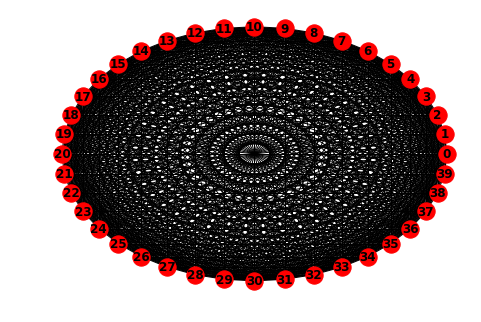

In [16]:
def test():
    n, m = 40, 2
    # net = RandomNMNet(n, m)
    net = StarLikeNet(n)
    dl = sorted_degree(net)

    # Test for lowest nodes.
    # while net.number_of_edges() < n*(n-1)//2:
    #     if not add_edge_to_lowest_nodes(net, dl): break

    # Test for highest nodes.
    # while net.number_of_edges() < n*(n-1)//2:
    #     if not add_edge_to_highest_nodes(net, dl): break

    # Test for random nodes.
    while net.number_of_edges() < n * (n - 1) // 2:
        if not add_edge_to_random_nodes(net, dl): break
    nx.draw_shell(net, with_labels=True, font_weight='bold')
    plt.show()


for i in range(1):
    print('=================', i+1, 1, '===================')
    test()
